# Gaussian Mixture Models (Unsupervised learning)

- suitable for both clustering and density estimation
- fitting a linear combination of Gaussians

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

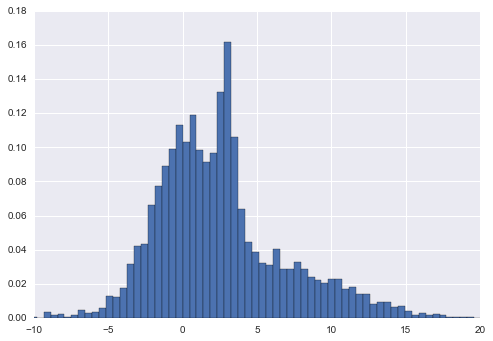

In [48]:
np.random.seed(2)
x = np.concatenate([np.random.normal(0, 2, 2000),
                    np.random.normal(5, 5, 2000),
                    np.random.normal(3, 0.5, 600)])
plt.hist(x, 80, normed=True)
plt.xlim(-10, 20);

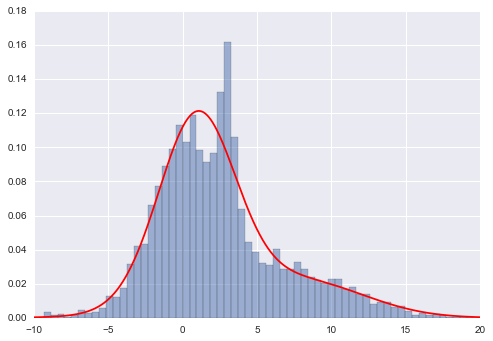

In [49]:
from sklearn.mixture import GMM
X = x[:, np.newaxis]
clf = GMM(4, n_iter=500, random_state=3).fit(X)
xpdf = np.linspace(-10, 20, 1000)
density = np.exp(clf.score(xpdf[:, np.newaxis]))

plt.hist(x, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
plt.xlim(-10, 20);

In [50]:
clf.means_

array([[ 3.95722594],
       [ 0.25029969],
       [ 1.45154151],
       [ 9.56336527]])

In [51]:
clf.covars_

array([[ 23.14843932],
       [  6.46691735],
       [  5.79759101],
       [ 14.80680322]])

In [52]:
clf.weights_

array([ 0.21904396,  0.31750123,  0.35379208,  0.10966273])

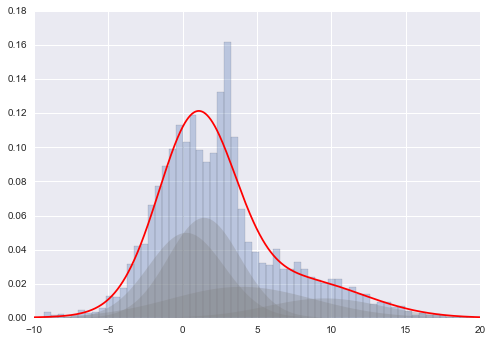

In [53]:
plt.hist(x, 80, normed=True, alpha=0.3)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covars_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-10, 20);

## Example: How many GRB groups Gaussians?

To evaluate how well it fits the data there is e.g. the Aikaki Information Criterion (AIC) and the Bayesian Information Criterion (BIC).

In [54]:
print(clf.bic(X))
print(clf.aic(X))

25911.2121006
25840.4401732


In [56]:
clf.aic?

In [57]:
# load BATSE t90 dat
_, _, _, _, t90, _, _ =np.loadtxt('data/batse_current_duration_table.txt',unpack=True)
x = np.log10(t90)

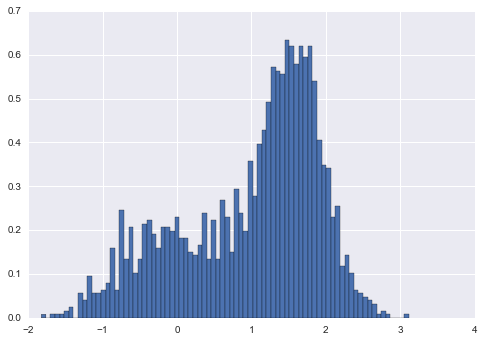

In [58]:
plt.hist(x, 80, normed=True)
plt.xlim(-2, 4);

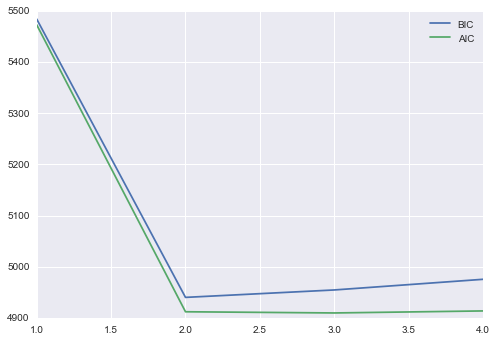

In [59]:
X = x[:, np.newaxis]
n_estimators = np.arange(1, 5)
clfs = [GMM(n, n_iter=1000).fit(X) for n in n_estimators]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();

In [43]:
clf = GMM(2, n_iter=500, random_state=3).fit(X)

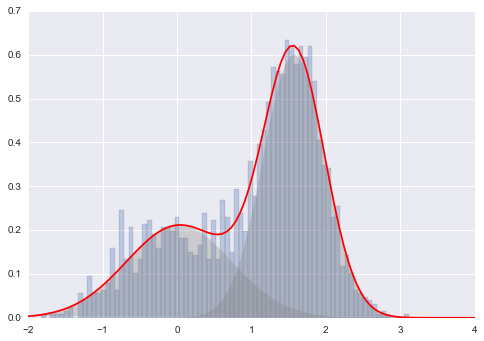

In [44]:
xpdf = np.linspace(-2, 4, 100)
density = np.exp(clf.score(xpdf[:, np.newaxis]))

plt.hist(x, 80, normed=True, alpha=0.3)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covars_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-2, 4);